<a href="https://colab.research.google.com/github/Gurudevasura/Analyzing_Bike_sharing_Trends/blob/main/Copy_of_Analyzing_Bike_sharing_Trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Dependencies

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np


# Exploratory data Analysis(EDA)

In [3]:
#Bike Sharing Dataset
hour_df = pd.read_csv("/hour.csv")
print(("shape of data::{}".format(hour_df.shape)))

shape of data::(17379, 17)


In [4]:
hour_df.head(1)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16


In [5]:
hour_df.rename(columns={'instant':'rec_ID','dteday':'datetime','yr':'year','mnth':'month','hr':'hour','holiday':'is_holiday','workingday':'is_workingday','weathersit':'weather_condition','temp':'temperature','hum':'humidity','cnt':'total_count'},inplace=True)
hour_df.head(1)


,rec_ID,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temperature,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16


In [6]:
#datetime conversion
hour_df['datetime']=pd.to_datetime(hour_df.datetime)

#Conversion
hour_df['season'] = hour_df.season.astype('category')
hour_df['is_holiday'] = hour_df.is_holiday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['weather_condition'] = hour_df.weather_condition.astype('category')
hour_df['is_workingday'] = hour_df.is_workingday.astype('category')
hour_df['month'] = hour_df.month.astype('category')
hour_df['year'] = hour_df.year.astype('category')
hour_df['hour'] = hour_df.hour.astype('category')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


[Text(0.5, 1.0, 'Season wise hourly distribution of counts')]

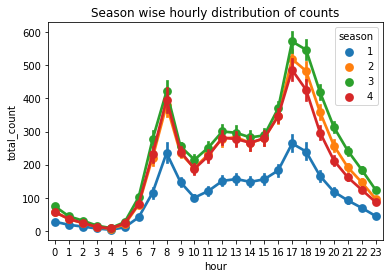

In [7]:
#Distribution and Trends
fig= plt.subplot()
ax =  plt.subplot()
sn.pointplot(data=hour_df[['hour','season','total_count']],x ='hour',y='total_count',hue='season',ax=ax)
ax.set(title="Season wise hourly distribution of counts")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


[Text(0.5, 1.0, 'monthly distribution of counts')]

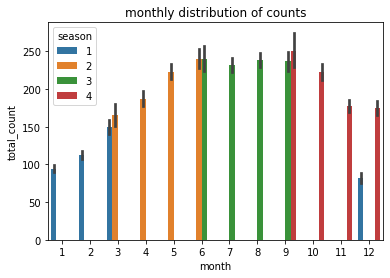

In [8]:
fig= plt.subplot()
ax =  plt.subplot()
sn.barplot(data=hour_df[['month','season','total_count']],x ='month',y='total_count',hue='season',ax=ax)
ax.set(title="monthly distribution of counts")

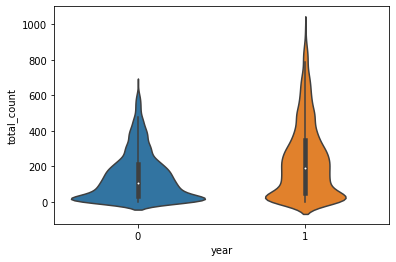

In [9]:
sn.violinplot(data=hour_df[['year','total_count']],x='year',y='total_count')

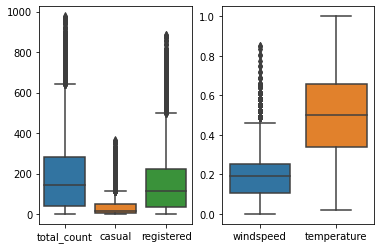

In [17]:
fig,(ax1,ax2) = plt.subplots(ncols=2)
#ax1,ax2 =plt.subplots(ncols=2)
sn.boxplot(data=hour_df[['total_count','casual','registered']],ax=ax1)
sn.boxplot(data=hour_df[['windspeed','temperature']],ax=ax2)

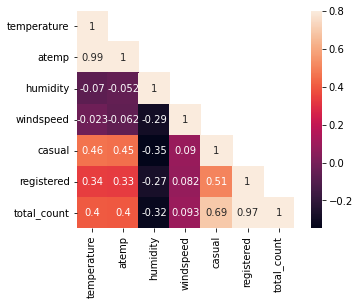

In [22]:
#correlations(It is important to understand that correlation does not imply causation.
cormatt = hour_df[['temperature','atemp',	'humidity',	'windspeed'	,'casual',	'registered',	'total_count']].corr()
mask = np.array(cormatt)
mask[np.tril_indices_from(mask)] = False
sn.heatmap(cormatt, mask=mask,vmax=.8, square=True,annot=True)